# 8장 머신러닝 응용

## 8.4 다양한 예측 사례 

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique(),
                      })
    for col in tf.index:
        tf.loc[col, '자료 내용(contents)'] = str(df[col].unique()[0:5])
        tf.loc[col, 'nan 비율'] = int(df[df[col] == 'nan'].shape[0]/len(df)*100)
        
    return tf

## Plot the decision surface of a decision tree on the iris dataset
https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

Automatically created module for IPython interactive environment


<AxesSubplot:>

Text(0.5, 129.10363636363638, 'sepal length (cm)')

Text(20.125, 0.5, 'sepal width (cm)')

<AxesSubplot:>

Text(0.5, 129.50000000000003, 'sepal length (cm)')

Text(142.4375, 0.5, 'petal length (cm)')

<AxesSubplot:>

Text(0.5, 137.50000000000003, 'sepal length (cm)')

Text(279.54166666666663, 0.5, 'petal width (cm)')

<AxesSubplot:>

Text(0.5, -0.5000000000000249, 'sepal width (cm)')

Text(22.625, 0.5, 'petal length (cm)')

<AxesSubplot:>

Text(0.5, 20.99999999999998, 'sepal width (cm)')

Text(157.62500000000006, 0.5, 'petal width (cm)')

<AxesSubplot:>

Text(0.5, 36.999999999999986, 'petal length (cm)')

Text(286.625, 0.5, 'petal width (cm)')

Text(0.5, 0.98, 'Decision surface of a decision tree using paired features')

(0.0, 7.88, -0.9, 3.4800000000000044)

<Figure size 432x288 with 0 Axes>

<Figure size 1800x432 with 0 Axes>

[Text(697.5, 298.98, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(590.1923076923077, 244.62, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(804.8076923076923, 244.62, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(429.2307692307692, 190.26000000000002, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(214.6153846153846, 135.9, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(107.3076923076923, 81.53999999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(321.9230769230769, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(643.8461538461538, 135.9, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(536.5384615384615, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(751.1538461538462, 81.53999999999999, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(643.8461538461538, 27.180000000000007, 'g

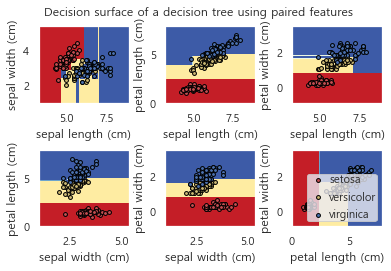

<Figure size 432x288 with 0 Axes>

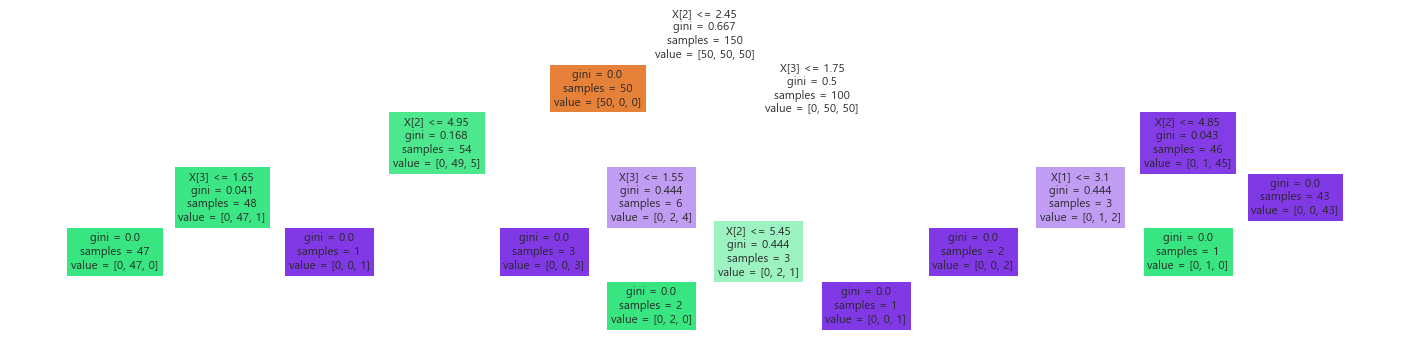

In [163]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.figure(figsize=(25,6))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## SVM-Anova: SVM with univariate feature selection
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html

In [164]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 64)

(1797, 7)

In [157]:
for percent in [10, 20, 30, 40, 50, 60]:
    SelectPercentile(chi2, percentile=percent).fit_transform(X, y).shape

(1797, 7)

(1797, 13)

(1797, 19)

(1797, 26)

(1797, 32)

(1797, 38)

In [159]:
SelectPercentile(chi2)
SelectPercentile(chi2).get_params()

SelectPercentile(score_func=<function chi2 at 0x000001BCD5266790>)

{'percentile': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Automatically created module for IPython interactive environment


Pipeline(steps=[('anova',
                 SelectPercentile(percentile=1,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=3,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=6,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=15,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=20,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=30,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=40,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=60,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=80,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=100,
                                  score_func=<function chi2 at 0x000001BCD5266790>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Performance of the SVM-Anova varying the percentile of features selected')

([<matplotlib.axis.XTick at 0x1bcd5252520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Percentile')

Text(0, 0.5, 'Accuracy Score')

(-3.95, 104.95, 0.7518429243937107, 1.007972170057833)

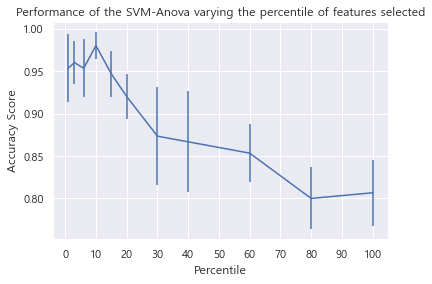

In [165]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
X, y = load_iris(return_X_y=True)
# Add non-informative features
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto")),
                #('rf', RandomForestClassifier()),
               ])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

## Time-related feature engineering
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#sphx-glr-auto-examples-applications-plot-cyclical-feature-engineering-py

In [3]:
from sklearn.datasets import fetch_openml
bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

In [4]:
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000,16.0
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,40.0
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000,32.0
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,13.0
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,119.0
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014,89.0
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014,90.0
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981,61.0


In [12]:
average_week_demand = df.groupby(["weekday", "hour"]).mean()["count"]
average_week_demand.shape
average_week_demand

(168,)

weekday  hour
0.0      0.0      93.990385
         1.0      77.432692
         2.0      61.627451
         3.0      31.144231
         4.0       9.362745
                    ...    
6.0      19.0    239.932692
         20.0    180.865385
         21.0    156.000000
         22.0    139.663462
         23.0    115.855769
Name: count, Length: 168, dtype: float64

<AxesSubplot:xlabel='weekday,hour'>

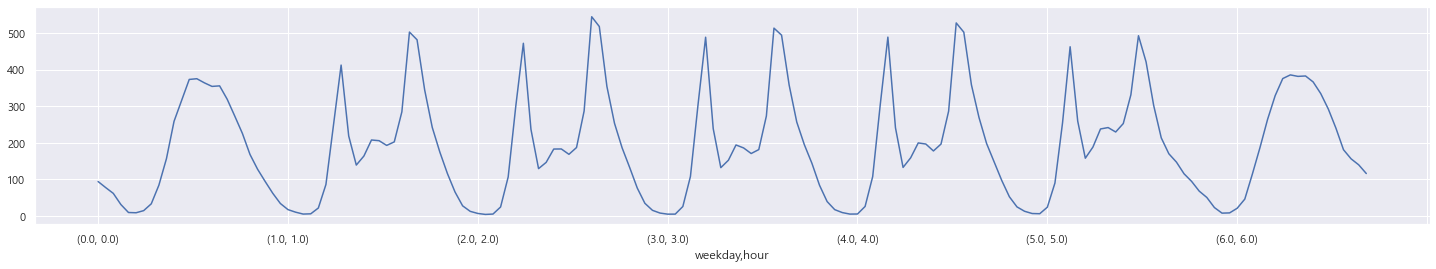

In [11]:
average_week_demand.plot(figsize=(25, 4))

<AxesSubplot:xlabel='weekday,hour'>

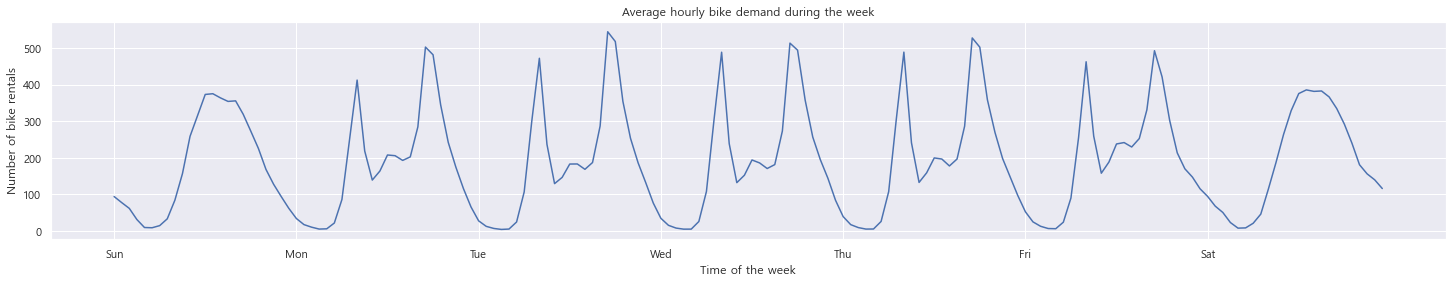

In [15]:
fig, ax = plt.subplots(figsize=(25, 4))
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

<AxesSubplot:>

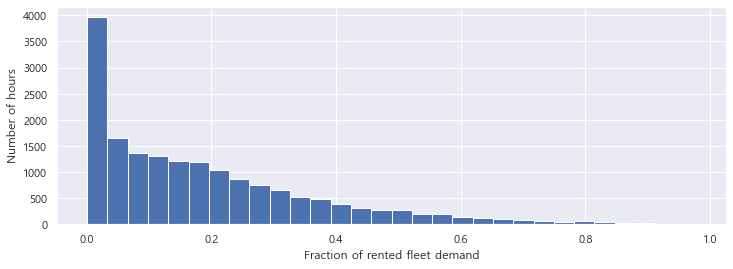

In [17]:
y = df["count"] / 1000

fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of rented fleet demand",
    ylabel="Number of hours",
)

In [18]:
X = df.drop("count", axis="columns")
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981


In [19]:
X["weather"].value_counts()

clear         11413
misty          4544
rain           1419
heavy_rain        3
Name: weather, dtype: int64

In [20]:
X["weather"].replace(to_replace="heavy_rain", value="rain", inplace=True)

In [21]:
X["weather"].value_counts()

clear    11413
misty     4544
rain      1422
Name: weather, dtype: int64

In [22]:
X["season"].value_counts()

fall      4496
summer    4409
spring    4242
winter    4232
Name: season, dtype: int64

In [25]:
from sklearn.model_selection import TimeSeriesSplit

In [29]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
#    gap=48,
    max_train_size=10000,
#    test_size=1000,
)

In [31]:
all_splits = list(ts_cv.split(X, y))
all_splits
train_0, test_0 = all_splits[0]

[(array([   0,    1,    2, ..., 2896, 2897, 2898]),
  array([2899, 2900, 2901, ..., 5792, 5793, 5794])),
 (array([   0,    1,    2, ..., 5792, 5793, 5794]),
  array([5795, 5796, 5797, ..., 8688, 8689, 8690])),
 (array([   0,    1,    2, ..., 8688, 8689, 8690]),
  array([ 8691,  8692,  8693, ..., 11584, 11585, 11586])),
 (array([ 1587,  1588,  1589, ..., 11584, 11585, 11586]),
  array([11587, 11588, 11589, ..., 14480, 14481, 14482])),
 (array([ 4483,  4484,  4485, ..., 14480, 14481, 14482]),
  array([14483, 14484, 14485, ..., 17376, 17377, 17378]))]

In [32]:
X.iloc[test_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
2899,summer,0.0,5.0,17.0,False,4.0,True,clear,22.96,26.515,0.26,26.0027
2900,summer,0.0,5.0,18.0,False,4.0,True,clear,22.96,26.515,0.26,19.0012
2901,summer,0.0,5.0,19.0,False,4.0,True,clear,22.14,25.760,0.28,15.0013
2902,summer,0.0,5.0,20.0,False,4.0,True,clear,20.50,24.240,0.34,11.0014
2903,summer,0.0,5.0,21.0,False,4.0,True,clear,20.50,24.240,0.36,12.9980
...,...,...,...,...,...,...,...,...,...,...,...,...
5790,fall,0.0,9.0,17.0,False,6.0,False,clear,29.52,34.090,0.70,15.0013
5791,fall,0.0,9.0,18.0,False,6.0,False,clear,29.52,34.090,0.70,11.0014
5792,fall,0.0,9.0,19.0,False,6.0,False,clear,28.70,33.335,0.74,8.9981
5793,fall,0.0,9.0,20.0,False,6.0,False,clear,28.70,33.335,0.79,11.0014


In [33]:
X.iloc[train_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2894,summer,0.0,5.0,12.0,False,4.0,True,clear,21.32,25.000,0.34,23.9994
2895,summer,0.0,5.0,13.0,False,4.0,True,clear,22.14,25.760,0.30,39.0007
2896,summer,0.0,5.0,14.0,False,4.0,True,clear,22.14,25.760,0.28,30.0026
2897,summer,0.0,5.0,15.0,False,4.0,True,clear,22.96,26.515,0.26,32.9975


In [34]:
train_4, test_4 = all_splits[4]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate


categorical_columns = [
    "weather",
    "season",
    "holiday",
    "workingday",
]
categories = [
    ["clear", "misty", "rain"],
    ["spring", "summer", "fall", "winter"],
    ["False", "True"],
    ["False", "True"],
]
ordinal_encoder = OrdinalEncoder(categories=categories)

In [39]:
gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
    ),
    RandomForestRegressor(),
)

In [40]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.054 +/- 0.016
Root Mean Squared Error: 0.082 +/- 0.023


In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
import numpy as np


one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
alphas = np.logspace(-6, 6, 25)
naive_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)


evaluate(naive_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.115 +/- 0.024
Root Mean Squared Error: 0.153 +/- 0.027


In [42]:
one_hot_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["hour", "weekday", "month"]),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)

evaluate(one_hot_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.086 +/- 0.017
Root Mean Squared Error: 0.115 +/- 0.020


## Column Transformer with Heterogeneous Data Sources
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer.html#sphx-glr-auto-examples-compose-plot-column-transformer-py

In [43]:
# Author: Matt Terry <matt.terry@gmail.com>
#
# License: BSD 3 clause

import numpy as np

from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC

In [44]:
categories = ['sci.med', 'sci.space']
X_train, y_train = fetch_20newsgroups(random_state=1,
                                      subset='train',
                                      categories=categories,
                                      remove=('footers', 'quotes'),
                                      return_X_y=True)
X_test, y_test = fetch_20newsgroups(random_state=1,
                                    subset='test',
                                    categories=categories,
                                    remove=('footers', 'quotes'),
                                    return_X_y=True)

In [45]:
print(X_train[0])

From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)
Subject: Re: Metric vs English
Article-I.D.: mksol.1993Apr6.131900.8407
Organization: Texas Instruments Inc
Lines: 31




American, perhaps, but nothing military about it.  I learned (mostly)
slugs when we talked English units in high school physics and while
the teacher was an ex-Navy fighter jock the book certainly wasn't
produced by the military.

[Poundals were just too flinking small and made the math come out
funny; sort of the same reason proponents of SI give for using that.] 

-- 
"Insisting on perfect safety is for people who don't have the balls to live
 in the real world."   -- Mary Shafer, NASA Ames Dryden


In [46]:
def subject_body_extractor(posts):
    # construct object dtype array with two columns
    # first column = 'subject' and second column = 'body'
    features = np.empty(shape=(len(posts), 2), dtype=object)
    for i, text in enumerate(posts):
        # temporary variable `_` stores '\n\n'
        headers, _, body = text.partition('\n\n')
        # store body text in second column
        features[i, 1] = body

        prefix = 'Subject:'
        sub = ''
        # save text after 'Subject:' in first column
        for line in headers.split('\n'):
            if line.startswith(prefix):
                sub = line[len(prefix):]
                break
        features[i, 0] = sub

    return features


subject_body_transformer = FunctionTransformer(subject_body_extractor)

In [47]:
def text_stats(posts):
    return [{'length': len(text),
             'num_sentences': text.count('.')}
            for text in posts]


text_stats_transformer = FunctionTransformer(text_stats)

In [48]:
pipeline = Pipeline([
    # Extract subject & body
    ('subjectbody', subject_body_transformer),
    # Use ColumnTransformer to combine the subject and body features
    ('union', ColumnTransformer(
        [
            # bag-of-words for subject (col 0)
            ('subject', TfidfVectorizer(min_df=50), 0),
            # bag-of-words with decomposition for body (col 1)
            ('body_bow', Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ]), 1),
            # Pipeline for pulling text stats from post's body
            ('body_stats', Pipeline([
                ('stats', text_stats_transformer),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ]), 1),
        ],
        # weight above ColumnTransformer features
        transformer_weights={
            'subject': 0.8,
            'body_bow': 0.5,
            'body_stats': 1.0,
        }
    )),
    # Use a SVC classifier on the combined features
    ('svc', LinearSVC(dual=False)),
], verbose=True)

In [49]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Classification report:\n\n{}'.format(
    classification_report(y_test, y_pred))
)

[Pipeline] ....... (step 1 of 3) Processing subjectbody, total=   0.0s
[Pipeline] ............. (step 2 of 3) Processing union, total=   2.1s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.1s


Pipeline(steps=[('subjectbody',
                 FunctionTransformer(func=<function subject_body_extractor at 0x000001BCCBF78550>)),
                ('union',
                 ColumnTransformer(transformer_weights={'body_bow': 0.5,
                                                        'body_stats': 1.0,
                                                        'subject': 0.8},
                                   transformers=[('subject',
                                                  TfidfVectorizer(min_df=50),
                                                  0),
                                                 ('body_bow',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer()),
                                                                  ('best',
                                                                   TruncatedSVD(n_components=50))]),
                          

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       396
           1       0.87      0.84      0.85       394

    accuracy                           0.86       790
   macro avg       0.86      0.86      0.86       790
weighted avg       0.86      0.86      0.86       790



## Column Transformer with Mixed Types
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

In [132]:
# Author: Pedro Morales <part.morales@gmail.com>
#
# License: BSD 3 clause

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Load data from https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

In [137]:
data = fetch_openml("titanic", version=1, as_frame=True)
df = pd.DataFrame(data.data, columns = data.feature_names)
df['class'] = data.target
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,class
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [138]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents),nan 비율
pclass,float64,0,0.00,3,[1. 2. 3.],0.0
name,object,0,0.00,1307,"['Allen, Miss. Elisabeth Walton' 'Allison, Mas...",0.0
sex,category,0,0.00,2,"['female', 'male']\nCategories (2, object): ['...",0.0
age,float64,263,0.20,98,[29. 0.9167 2. 30. 25. ],0.0
sibsp,float64,0,0.00,7,[0. 1. 2. 3. 4.],0.0
parch,float64,0,0.00,8,[0. 2. 1. 4. 3.],0.0
ticket,object,0,0.00,929,['24160' '113781' '19952' '13502' '112050'],0.0
fare,float64,1,0.00,281,[211.3375 151.55 26.55 77.9583 0. ],0.0
cabin,object,1014,0.77,186,['B5' 'C22 C26' 'E12' 'D7' 'A36'],0.0
embarked,category,2,0.00,3,"['S', 'C', NaN, 'Q']\nCategories (3, object): ...",0.0


In [151]:
df = df[['age', 'fare', 'embarked', 'sex', 'pclass', 'class']]
df.sex = df.sex.astype('category')
df.pclass = df.pclass.astype('category')
df = df.dropna()

In [152]:
X= df.drop('class', axis=1)
y= df['class']

In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1043 non-null   float64 
 1   fare      1043 non-null   float64 
 2   embarked  1043 non-null   category
 3   sex       1043 non-null   category
 4   pclass    1043 non-null   category
dtypes: category(3), float64(2)
memory usage: 27.9 KB


In [154]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

model score: 0.813


## BaseEstimator, TransformerMixin

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

## 2. 사이킷런 데이터셋

In [66]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [67]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents),nan 비율
season,category,0,0.0,4,"['spring', 'summer', 'fall', 'winter']\nCatego...",0.0
year,float64,0,0.0,2,[0. 1.],0.0
month,float64,0,0.0,12,[1. 2. 3. 4. 5.],0.0
hour,float64,0,0.0,24,[0. 1. 2. 3. 4.],0.0
holiday,category,0,0.0,2,"['False', 'True']\nCategories (2, object): ['F...",0.0
weekday,float64,0,0.0,7,[6. 0. 1. 2. 3.],0.0
workingday,category,0,0.0,2,"['False', 'True']\nCategories (2, object): ['F...",0.0
weather,category,0,0.0,3,"['clear', 'misty', 'rain']\nCategories (3, obj...",0.0
temp,float64,0,0.0,50,[ 9.84 9.02 8.2 13.12 15.58],0.0
feel_temp,float64,0,0.0,65,[14.395 13.635 12.88 17.425 19.695],0.0


In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

In [69]:
class AgeTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['age'].fillna(X.age.mean(), inplace=True)
        X['age'] = X['age'].astype('int')
        return X

In [70]:
agetransform = AgeTransformer()
agetransform.fit_transform(X).tail()
agetransform.fit_transform(X).age.isnull().sum()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,"Zabour, Miss. Hileni",female,14,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,"Zabour, Miss. Thamine",female,29,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,"Zakarian, Mr. Mapriededer",male,26,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,3.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,7.8750,None,S,None,NaN,None


0

In [71]:
class NameTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.name = []
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for name in range(len(X['name'])):
            self.name.append(X['name'][name].split(',')[0])
        X['name'] = self.name
        return X

In [72]:
X.tail()
nametransform = NameTransformer()
nametransform.fit_transform(X).tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,"Zabour, Miss. Hileni",female,14,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,"Zabour, Miss. Thamine",female,29,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,"Zakarian, Mr. Mapriededer",male,26,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,"Zakarian, Mr. Ortin",male,27,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,3.0,"Zimmerman, Mr. Leo",male,29,0.0,0.0,315082,7.8750,None,S,None,NaN,None


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,Zabour,female,14,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,Zabour,female,29,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,Zakarian,male,26,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,Zakarian,male,27,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,3.0,Zimmerman,male,29,0.0,0.0,315082,7.8750,None,S,None,NaN,None


In [73]:
pipeline = Pipeline([
    ('agetransform', AgeTransformer()),
    ('nametransform', NameTransformer())
])

In [74]:
pipeline.fit_transform(X).tail()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,Zabour,female,14,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,Zabour,female,29,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,Zakarian,male,26,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,Zakarian,male,27,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,3.0,Zimmerman,male,29,0.0,0.0,315082,7.8750,None,S,None,NaN,None


## 4. Target mean

In [75]:
titanic = sns.load_dataset('titanic')
train = titanic.drop(['age', 'parch', 'embarked', 'class', 'who', 'adult_male', 
                      'deck', 'embark_town', 'alive', 'alone'], axis = 1)
X = train.drop('survived', axis = 1) 
y = train.survived
df = pd.merge(X, y, left_index=True, right_index=True)

In [76]:
df['sex'] = df['sex'].astype('category')
target_mean = df.groupby(['pclass'])['survived'].mean().to_dict()
df['pclass'] = df['pclass'].map(target_mean)

In [84]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
cat = df.select_dtypes(include=['category']).columns
X = pd.get_dummies(df.drop(['survived'], axis=1), prefix= cat)
y = df['survived']
kf = KFold(n_splits=5)
clf = RandomForestClassifier(n_estimators = 100, random_state = 11)
cross_val_score(clf, X, y, cv=kf)
cross_val_score(clf, X, y, cv=kf).mean()

array([0.75418994, 0.79213483, 0.85393258, 0.82022472, 0.80337079])

0.8047705730964786

In [86]:
from sklearn.metrics import accuracy_score
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index]    
    y_predict = clf.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
accuracy_list
print('모델 평균 정확도', sum(accuracy_list)/len(accuracy_list))

[0.7541899441340782,
 0.7921348314606742,
 0.8539325842696629,
 0.8202247191011236,
 0.8033707865168539]

모델 평균 정확도 0.8047705730964786


## pipeline with mean_target

In [ ]:
def mean_encoding(X, y, column, target):
    df = pd.merge(X, y, left_index=True, right_index=True)
    means_list = df.groupby(by=column)[target].mean()    
    return df[column].map(means_list)

In [ ]:
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index] 
    X_train['pclass'] = mean_encoding(X_train, y_train, 'pclass', 'survived')
    X_test['pclass'] = mean_encoding(X_test, y_test, 'pclass', 'survived')    
    y_predict = clf.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
accuracy_list
print('모델 평균 정확도', sum(accuracy_list)/len(accuracy_list))

## 5. BaseEstimator, TransformerMixin 사용자정의 함수와 파이프라인

# Get the data

In [23]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
df.feature_names.extend(df.target_names)
housing = pd.DataFrame(np.c_[df.data, df.target], columns = df.feature_names)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
np.random.seed(42)

# Discover and visualize the data to gain insights

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

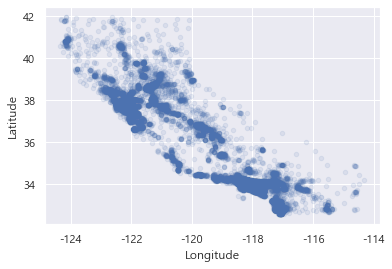

In [33]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

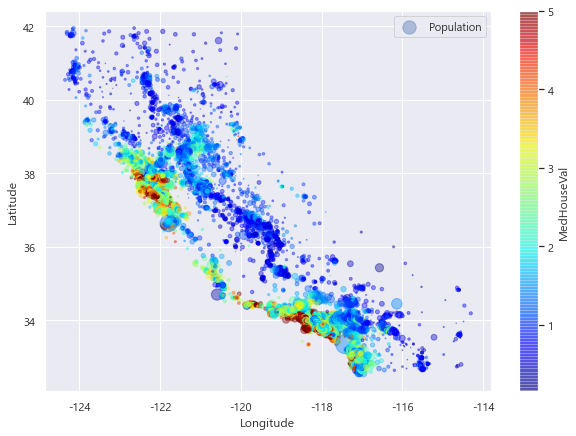

In [35]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=housing["Population"]/100, label="Population", figsize=(10,7),
    c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

0.6880752079585477

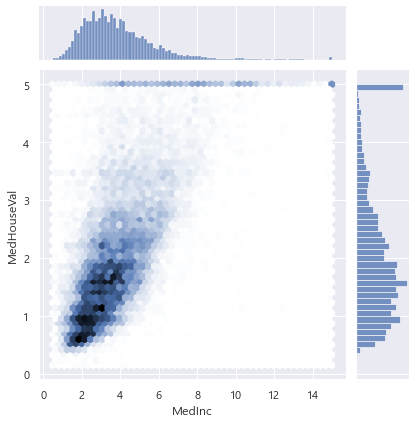

In [38]:
sns.jointplot("MedInc", "MedHouseVal", data=housing, kind="hex")
housing.MedInc.corr(housing.MedHouseVal)

# Prepare the data for Machine Learning algorithms

In [115]:
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [116]:
X = housing.drop(['Longitude', 'Latitude', 'MedHouseVal'], axis=1)
y = housing['MedHouseVal']
X.head()
y.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [117]:
X = housing.drop(['Longitude', 'Latitude', 'MedHouseVal'], axis=1)
y = housing['MedHouseVal']
X.head()
y.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 1, 2, 3, 4

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder()
X_extra_attribs = attr_adder.transform(X.values)
X_extra_attribs = pd.DataFrame(
    X_extra_attribs,
    columns=list(X.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

X_extra_attribs.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,rooms_per_household,population_per_household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,0.127329,0.003180
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,0.008746,0.000405
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,0.104839,0.002164
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,0.093190,0.001923
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,0.092035,0.001913


### Now let's build a pipeline for preprocessing the numerical attributes:

In [43]:
from sklearn.impute import SimpleImputer
X_num = X.drop(['ocean_proximity'], axis=1)
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])  
                 
X_num_tr = num_pipeline.fit_transform(X_num)
X_num_tr = pd.DataFrame(
    X_num_tr,
    columns=list(X_num.columns)+["rooms_per_household",
                                 "population_per_household"],
    index=housing.index)
X_num_tr.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-0.049597
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.092512
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-0.025843
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.050329
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.085616


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(X_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(X)
X_prepared

array([[ 0.98214266, -0.8048191 , -0.97247648, ...,  0.        ,
         1.        ,  0.        ],
       [-0.60701891,  2.0458901 ,  1.35714343, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.85618152, -0.53574589, -0.82702426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.92485123, -0.17499526, -0.12360781, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84539315, -0.35559977, -0.30482697, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00430931,  0.06840827,  0.18875678, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
full_pipeline
full_pipeline.named_transformers_
full_pipeline.named_transformers_["cat"].categories_[0]

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('attribs_adder', CombinedAttributesAdder()),
                 ('std_scaler', StandardScaler())]), 'cat': OneHotEncoder()}

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                                 scoring='neg_mean_squared_error')
grid_search.fit(X_prepared, y)
grid_search.best_estimator_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   scoring='neg_mean_squared_error')

RandomForestRegressor(max_features=8, n_estimators=30)

In [47]:
grid_search.best_params_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'n_estimators': 30, 'max_features': 8}

78502.87223731854 {'n_estimators': 3, 'max_features': 2}
72199.59033414512 {'n_estimators': 10, 'max_features': 2}
67574.18046384654 {'n_estimators': 30, 'max_features': 6}
67989.15323935637 {'n_estimators': 30, 'max_features': 4}
75868.54758845584 {'n_estimators': 3, 'max_features': 4}
72159.50007044057 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
77248.2642587888 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
71206.08142417722 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
67101.98905853648 {'n_estimators': 30, 'max_features': 8}
70066.61648368947 {'n_estimators': 30, 'max_features': 2}


In [48]:
best_params = grid_search.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
model= RandomForestRegressor().set_params(**tuned_params)
model.fit(X_prepared, y)

RandomForestRegressor(max_features=8, n_estimators=30)

In [49]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(model.feature_importances_, attributes), reverse=True)

[(0.4428327335736995, 'median_income'),
 (0.16299099014715565, '<1H OCEAN'),
 (0.13185111778326147, 'pop_per_hhold'),
 (0.07583806589870913, 'rooms_per_hhold'),
 (0.06217933320656921, 'housing_median_age'),
 (0.028740793263527315, 'total_bedrooms'),
 (0.027825063277791696, 'total_rooms'),
 (0.026887272079277512, 'population'),
 (0.025498953363873502, 'households'),
 (0.006313930508786268, 'bedrooms_per_room'),
 (0.004760688985436077, 'NEAR BAY'),
 (0.003933669064277753, 'ISLAND'),
 (0.00034738884763492835, 'INLAND')]

<BarContainer object of 13 artists>

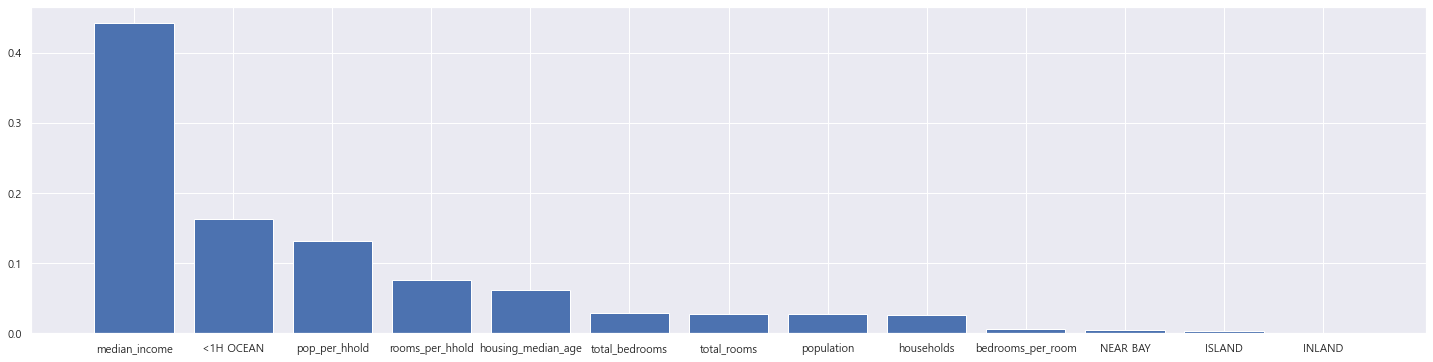

In [50]:
im = dict(sorted(zip(model.feature_importances_, attributes), reverse=True))
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(list(im.values()), list(im.keys()), align='center')

## BaseEstimator
https://scikit-learn.org/stable/auto_examples/cluster/plot_inductive_clustering.html#sphx-glr-auto-examples-cluster-plot-inductive-clustering-py

Automatically created module for IPython interactive environment


<Figure size 864x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Ward Linkage')

<AxesSubplot:>

Text(0.5, 1.0, 'Unknown instances')

<AxesSubplot:>

Text(0.5, 1.0, 'Classify unknown instances')

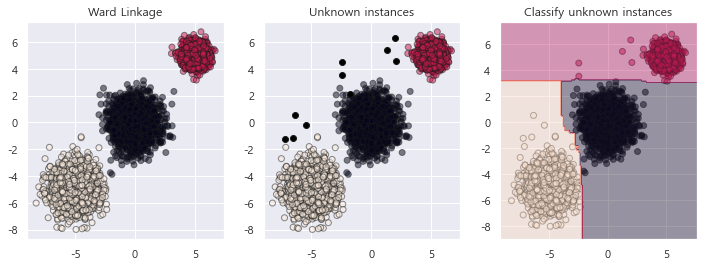

In [29]:
# Authors: Chirag Nagpal
#          Christos Aridas
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
#from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted


N_SAMPLES = 5000
RANDOM_STATE = 42


def _classifier_has(attr):
    """Check if we can delegate a method to the underlying classifier.

    First, we check the first fitted classifier if available, otherwise we
    check the unfitted classifier.
    """
    return lambda estimator: (
        hasattr(estimator.classifier_, attr)
        if hasattr(estimator, "classifier_")
        else hasattr(estimator.classifier, attr)
    )


class InductiveClusterer(BaseEstimator):
    def __init__(self, clusterer, classifier):
        self.clusterer = clusterer
        self.classifier = classifier

    def fit(self, X, y=None):
        self.clusterer_ = clone(self.clusterer)
        self.classifier_ = clone(self.classifier)
        y = self.clusterer_.fit_predict(X)
        self.classifier_.fit(X, y)
        return self

    #@available_if(_classifier_has("predict"))
    def predict(self, X):
        check_is_fitted(self)
        return self.classifier_.predict(X)

    #@available_if(_classifier_has("decision_function"))
    def decision_function(self, X):
        check_is_fitted(self)
        return self.classifier_.decision_function(X)


def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")


# Generate some training data from clustering
X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)


# Train a clustering algorithm on the training data and get the cluster labels
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_scatter(X, cluster_labels)
plt.title("Ward Linkage")


# Generate new samples and plot them along with the original dataset
X_new, y_new = make_blobs(
    n_samples=10, centers=[(-7, -1), (-2, 4), (3, 6)], random_state=RANDOM_STATE
)

plt.subplot(132)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, "black", 1)
plt.title("Unknown instances")


# Declare the inductive learning model that it will be used to
# predict cluster membership for unknown instances
classifier = RandomForestClassifier(random_state=RANDOM_STATE)
inductive_learner = InductiveClusterer(clusterer, classifier).fit(X)

probable_clusters = inductive_learner.predict(X_new)


plt.subplot(133)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, probable_clusters)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = inductive_learner.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.title("Classify unknown instances")

plt.show()